In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [62]:
file_path = r"https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
df = pd.read_csv(file_path, index_col=0)

In [63]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [64]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [65]:
# 특성과 레이블 분리
X = df.drop('Rings',axis=1)
y = df['Rings']

In [66]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [67]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])  # 'M','F','I' → 0,1,2

In [68]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341,), (836, 8), (836,))

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 회귀는 출력 1개, activation 없음

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
N_EPOCHS = 70

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.4934 - mae: 7.6449 - val_loss: 18.1708 - val_mae: 3.3155
Epoch 2/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.1015 - mae: 2.6769 - val_loss: 6.4586 - val_mae: 1.8101
Epoch 3/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2708 - mae: 1.8080 - val_loss: 5.7616 - val_mae: 1.7158
Epoch 4/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4399 - mae: 1.8043 - val_loss: 5.4980 - val_mae: 1.6707
Epoch 5/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3280 - mae: 1.6976 - val_loss: 5.3477 - val_mae: 1.6537
Epoch 6/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8224 - mae: 1.7038 - val_loss: 5.1342 - val_mae: 1.6798
Epoch 7/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7236 - mae: 1.6449 - val_loss: 4.9716 - val_mae: 1.5970
Epoch 8/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3426 - mae: 1.5929 - val_loss: 4.8497 - val_mae: 1.5925
Epoch 9/70
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

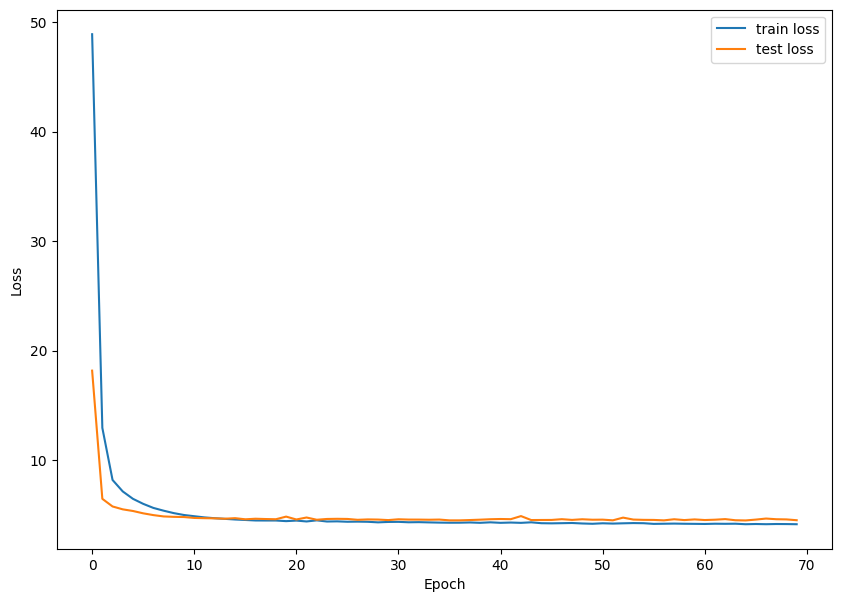

In [75]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 4.5752 - mae: 1.5087


[4.505042552947998, 1.5167787075042725]